<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Importing the required libraries we need for the lab:


In [70]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [71]:
import pandas as pd
import requests as rq
import io
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as sst
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

#### Read the dataset in the csv file from the URL


In [72]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = rq.get(URL).text
boston_url = io.StringIO(resp)

In [73]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Charts:

### - Boxplot to show the median value of owner-occupied homes in $1000's in Boston:

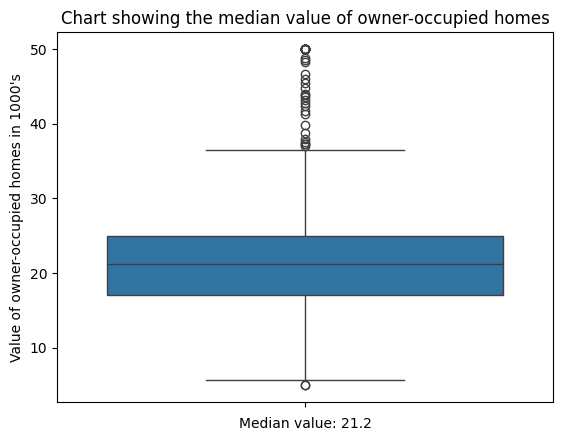

In [74]:
MEDV_median = boston_df['MEDV'].median()
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title("Chart showing the median value of owner-occupied homes")
ax.set_xlabel(f"Median value: {MEDV_median}")
ax.set_ylabel("Value of owner-occupied homes in 1000's")
pyplot.show()

#### ***Conclusions:** We can see that median value of owner occupied homes has a wide range of values, with minimum values starting with values lower than 10 000 dollars and maximum values going upwards of 40 000 dollars. Median values lies on 21 200 dollars. 

### - Bar plot of the River Charles variable (number of properties bounded/not bounded by River Charles):


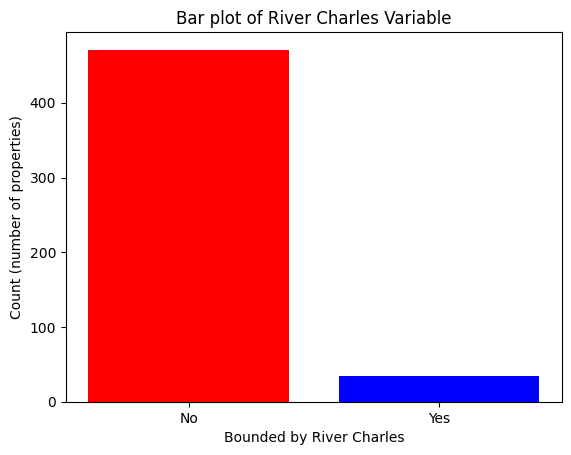

In [75]:
boston_df.loc[(boston_df['CHAS']==1), 'Bounded_by_River_Charles']='Yes'
boston_df.loc[(boston_df['CHAS']==0), 'Bounded_by_River_Charles']='No'
sorted_counts = boston_df.Bounded_by_River_Charles.value_counts().sort_index()
pyplot.bar(sorted_counts.index, sorted_counts.values, color=['red', 'blue'])
pyplot.title('Bar plot of River Charles Variable')
pyplot.xlabel('Bounded by River Charles')
pyplot.ylabel('Count (number of properties)')
pyplot.show()

#### ***Conclusion:** We can see that the number of properties that are not bound by the River Charles by far exceeds the number of properties that are bound by the River Charles.  

### - Boxplot of MEDV vs AGE:

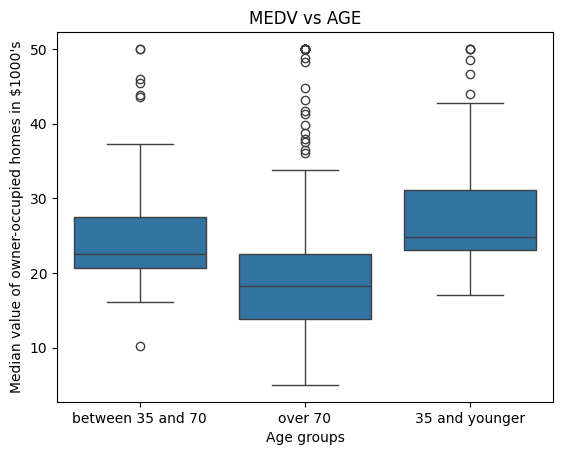

In [86]:
#Discretizing of AGE varible
thirtyfive_lower = boston_df.loc[(boston_df['AGE']<=35), 'age_group']='35 and younger'
thirtyfive_seventy = boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70), 'age_group']='between 35 and 70'
over_seventy = boston_df.loc[(boston_df['AGE']>=70), 'age_group']='over 70'

#Making the boxplot 
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
ax.set_title('MEDV vs AGE')
ax.set_xlabel('Age groups')
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
pyplot.show()

#### ***Conclusion:** We can see that the median value of the youngest properties (35 and younger) have the highest median and minimum/maximum values, which can be expected.

### - Scatterplot to show the relationship between nitric oxide concentrations and the proportion of non-retail business acres per town: 

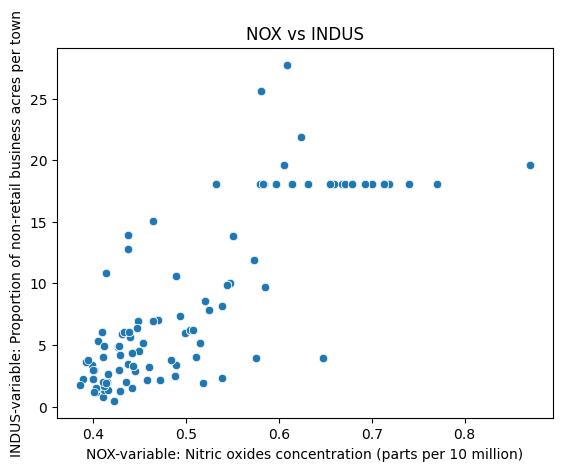

In [87]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title('NOX vs INDUS')
ax.set_xlabel('NOX-variable: Nitric oxides concentration (parts per 10 million)')
ax.set_ylabel('INDUS-variable: Proportion of non-retail business acres per town')
pyplot.show()

#### ***Conclusion:** We can say that the relationship follows a downward slope and that the zones with less nitric oxide are less likely to host a large proportion of non-retail business acres. 


### - Pupil to teacher ratio by town-histogram:


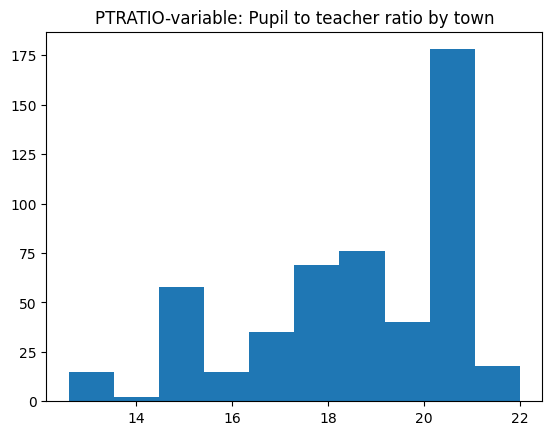

In [88]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.title('PTRATIO-variable: Pupil to teacher ratio by town')
pyplot.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not?
##### H_0: There is no difference between the median values (M_1 = M_2) 
##### H_A: There is a difference between the median values (M_1 ≠ M_2) (two-tailed test)
##### Significance level α = 0.05 

In [79]:
#Levene to test equality of variances 
print(sst.levene(boston_df[boston_df['Bounded_by_River_Charles']=='Yes']['MEDV'],
                 boston_df[boston_df['Bounded_by_River_Charles']=='No']['MEDV'], center='median'))

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)


##### **We can see that the calculated p-value is 0.033 approx. which means that we can say that the variances between observed median values er equal.

In [80]:
#Independent t-test to test the if there is a difference between median values.
print(sst.ttest_ind(boston_df[boston_df['Bounded_by_River_Charles']=='Yes']['MEDV'],
                    boston_df[boston_df['Bounded_by_River_Charles']=='No']['MEDV'], equal_var=True))

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)


#### ***Conclusion:** We can say that there is a statistical difference between the two median values, since the calculated p-value is approx 7.391 times ten to the power of -5 which is approx. 0.000074.


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

##### H_0: There is no statistical difference between median values in the groups (M_1 = M_2) (two-tailed test)
##### H_A: There is a statistical difference between median values in the groups (M_1 ≠ M_2)
##### Significance level α = 0.05


In [81]:
#Discretizing the AGE variable in three different groups
thirtyfive_lower = boston_df[boston_df['age_group']=='35 and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group']=='between 35 and 70']['MEDV']
over_seventy = boston_df[boston_df['age_group']=='over 70']['MEDV']


In [82]:
#Performing Levene test to test the equality of variances
print(sst.levene(thirtyfive_lower, thirtyfive_seventy, over_seventy, center='median'))

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)


##### ***Conclusion:** Variances are equal, p-value approx. 0.032 < 0.05

In [83]:
#Performing ANOVA f oneway statistics
f_statistic, p_value = sst.f_oneway(thirtyfive_lower, thirtyfive_seventy, over_seventy)
print("F-Statistic: {}; P-Value: {}".format(f_statistic, p_value))

F-Statistic: 36.40764999196599; P-Value: 1.7105011022702984e-15


#### ***Conclusion:** We can say that there is a significant statistical difference in median values of properties with different ages (different age groups) since the calculated p-value is 1.71 times ten to the power of -15 which is less than 0.05. 

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

##### H_0: There is no statistically significant realtionship between the two variables 
##### H_A: There is a statistically significant relationship between the two variables
##### Significance level α = 0.05

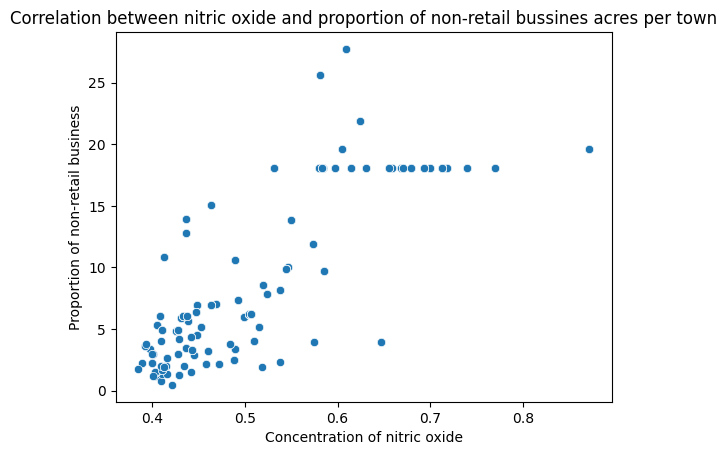

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)


In [84]:
#Generating a scater plot for visual representation of the relationship 
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title('Correlation between nitric oxide and proportion of non-retail bussines acres per town')
ax.set_xlabel('Concentration of nitric oxide')
ax.set_ylabel('Proportion of non-retail business')
pyplot.show()

#Performing PearsonR correlation test for continuous variables
print(sst.pearsonr(boston_df['NOX'], boston_df['INDUS']))

#### ***Conclusion:** We can say that there is a strong positive statistical relationship (the dependent variable grows as the independent variable grows). The proportion of non-retail business grows with the growth of the concentration of the nitiric oxide in the ground: p-value much less than 0.05 and r = 0.764 which points to a strong positive correlation.

### What is the impact of an additional weighted distance to the five Boston employment centres (DIS variable) on the median value of owner occupied homes (MEDV variable)?

##### H_0: There is no statistically significant impact of DIS variable on MEDV variable 
##### H_A: There is a statistically significant impact of DIS variable on MEDV variable
##### Significance level α = 0.05 


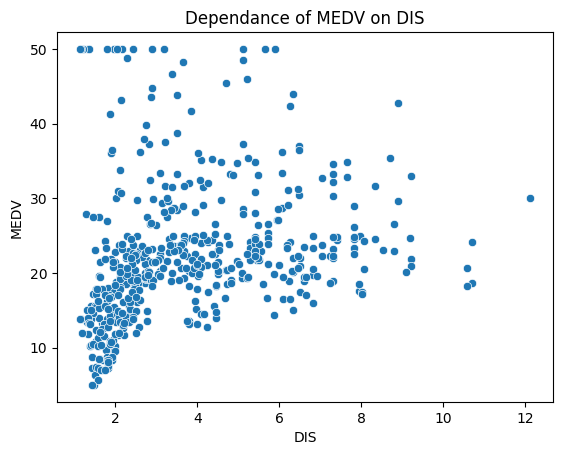

PearsonRResult(statistic=0.2499287340859039, pvalue=1.2066117273371074e-08)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        21:33:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [85]:
#Generating scatterplot of dependance of median value of owner occupied homes (MEDV) on additional weighted distance 
#to the five Boston employment centers (DIS)
ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
ax.set_title('Dependance of MEDV on DIS')
ax.set_xlabel('DIS')
ax.set_ylabel('MEDV')
pyplot.show()

#First running pearsonr
print(sst.pearsonr(boston_df['DIS'], boston_df['MEDV']))

#Running the regression analysis
X = boston_df['DIS'] #Independent variable 
y = boston_df['MEDV'] #Dependent variable
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predicitions = model.predict(X)
print(model.summary())

#### ***Conclusion:** On the scatterplot we can see downward slope and from the R-squared value which is 0.062 we can get r-value which is approx. 0.25 and indicates a weak positive correlation. P-value of 1.21 times ten to the power of -8 is 0.0000000121 and less than 0.05 and indicates that there is a significant statistical impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. 